In [8]:
from google.colab import files
uploaded = files.upload()

Saving Thunderbit - 65b838f9-b41b-4128-980a-e890d6e0b51e.csv to Thunderbit - 65b838f9-b41b-4128-980a-e890d6e0b51e (1).csv


In [2]:
!pip install pandas numpy matplotlib seaborn scikit-learn


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


In [6]:


df = pd.read_csv('Thunderbit - 65b838f9-b41b-4128-980a-e890d6e0b51e.csv')


In [9]:

print("Shape:", df.shape)
print("\nColumns:", df.columns.tolist())
print("\nData Types:\n", df.dtypes)
print("\nNull Values:\n", df.isnull().sum())
print("\nDuplicate Rows:", df.duplicated().sum())


Shape: (40, 4)

Columns: ['Brand Names', 'Apr 1, 2025', 'May 15, 2025', '%Change']

Data Types:
 Brand Names     object
Apr 1, 2025     object
May 15, 2025    object
%Change         object
dtype: object

Null Values:
 Brand Names     0
Apr 1, 2025     0
May 15, 2025    0
%Change         0
dtype: int64

Duplicate Rows: 0


In [10]:
# Rename columns
df.columns = ['Brand', 'Apr_1_2025', 'May_15_2025', 'Percent_Change']

# Remove $ and % symbols and convert to float
df['Apr_1_2025'] = df['Apr_1_2025'].replace('[\$,]', '', regex=True).astype(float)
df['May_15_2025'] = df['May_15_2025'].replace('[\$,]', '', regex=True).astype(float)
df['Percent_Change'] = df['Percent_Change'].replace('%', '', regex=True).astype(float)

# Preview
df.head()


,Brand,Apr_1_2025,May_15_2025,Percent_Change
0,Ray-Ban,173.05,201.15,18.30
1,Ralph Lauren,187.84,197.13,13.24
2,Tory Burch,333.14,356.25,12.11
3,Calvin Klein,71.61,78.29,10.43
4,Alexander McQueen,719.52,760.45,9.50


In [11]:
# Create new features
df['Absolute_Change'] = df['May_15_2025'] - df['Apr_1_2025']
df['Price_Ratio'] = df['May_15_2025'] / df['Apr_1_2025']
df['High_Growth'] = (df['Percent_Change'] > df['Percent_Change'].median()).astype(int)

df.head()


,Brand,Apr_1_2025,May_15_2025,Percent_Change,Absolute_Change,Price_Ratio,High_Growth
0,Ray-Ban,173.05,201.15,18.30,28.10,1.162381,0
1,Ralph Lauren,187.84,197.13,13.24,9.29,1.049457,0
2,Tory Burch,333.14,356.25,12.11,23.11,1.069370,0
3,Calvin Klein,71.61,78.29,10.43,6.68,1.093283,0
4,Alexander McQueen,719.52,760.45,9.50,40.93,1.056885,0


/tmp/ipython-input-12-1017640858.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_brands, x='Percent_Change', y='Brand', palette='viridis')


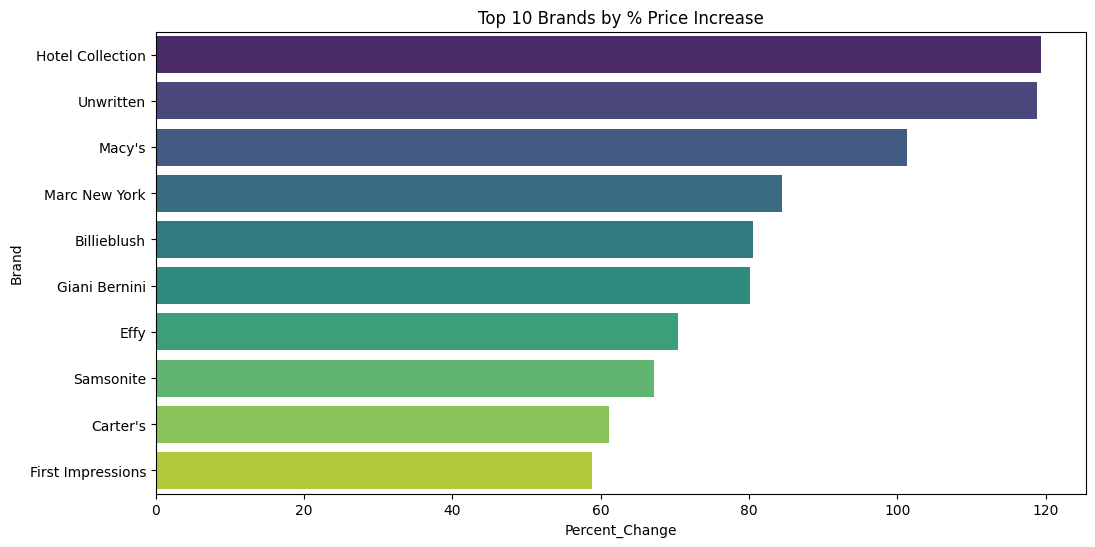

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt

# Top brands by % change
top_brands = df.sort_values('Percent_Change', ascending=False).head(10)

plt.figure(figsize=(12,6))
sns.barplot(data=top_brands, x='Percent_Change', y='Brand', palette='viridis')
plt.title('Top 10 Brands by % Price Increase')
plt.show()


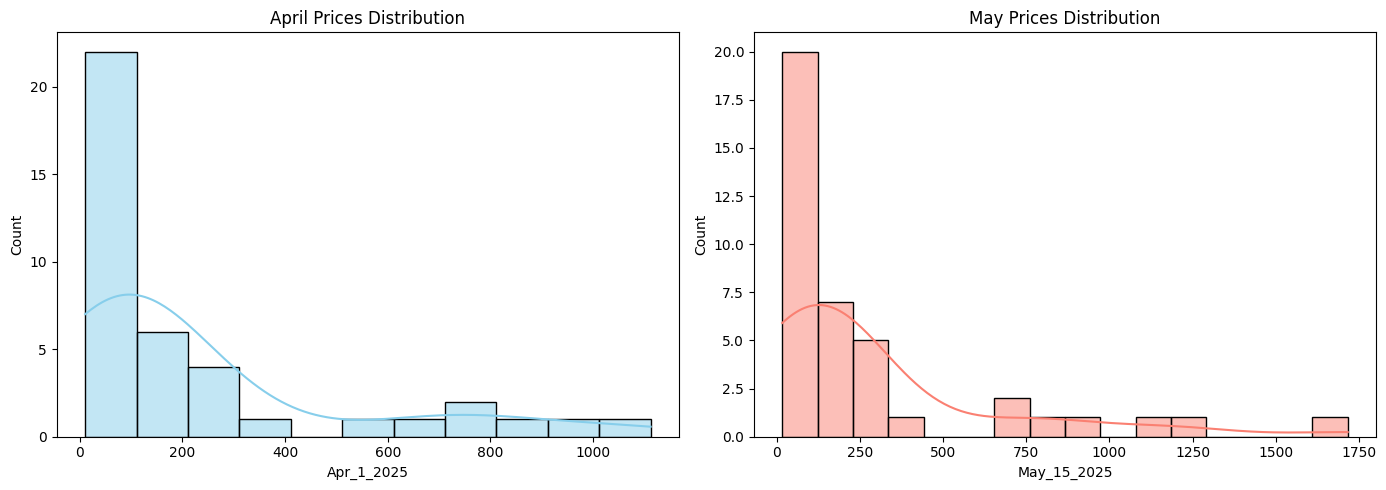

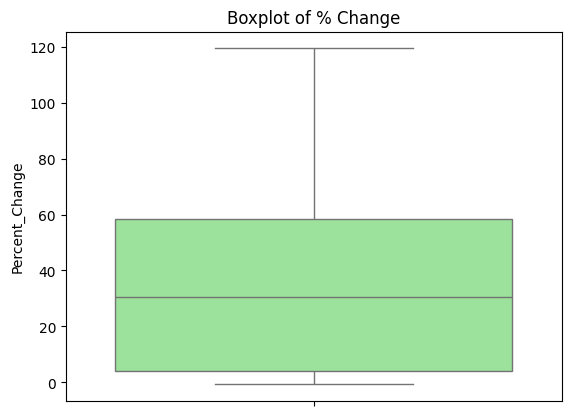

In [13]:
# Price distributions
plt.figure(figsize=(14,5))

plt.subplot(1,2,1)
sns.histplot(df['Apr_1_2025'], kde=True, color='skyblue')
plt.title('April Prices Distribution')

plt.subplot(1,2,2)
sns.histplot(df['May_15_2025'], kde=True, color='salmon')
plt.title('May Prices Distribution')

plt.tight_layout()
plt.show()

# Boxplot of % Change
sns.boxplot(df['Percent_Change'], color='lightgreen')
plt.title('Boxplot of % Change')
plt.show()


In [14]:
from scipy.stats import pearsonr, ttest_rel

# Correlation between prices
corr, _ = pearsonr(df['Apr_1_2025'], df['May_15_2025'])
print(f"Pearson Correlation (April vs May): {corr:.2f}")

# Paired t-test to check if price increased significantly
t_stat, p_val = ttest_rel(df['May_15_2025'], df['Apr_1_2025'])
print(f"T-test: t={t_stat:.2f}, p-value={p_val:.4f}")
if p_val < 0.05:
    print("✅ Significant price increase (p < 0.05)")
else:
    print("❌ No significant price increase")


Pearson Correlation (April vs May): 0.94
T-test: t=2.49, p-value=0.0170
✅ Significant price increase (p < 0.05)


In [15]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix

# Features and target
X = df[['Apr_1_2025', 'May_15_2025', 'Absolute_Change', 'Price_Ratio']]
y = df['High_Growth']

# Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Model
model = LogisticRegression()
model.fit(X_train_scaled, y_train)
y_pred = model.predict(X_test_scaled)

# Evaluation
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))


[[5 0]
 [0 3]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       1.00      1.00      1.00         3

    accuracy                           1.00         8
   macro avg       1.00      1.00      1.00         8
weighted avg       1.00      1.00      1.00         8



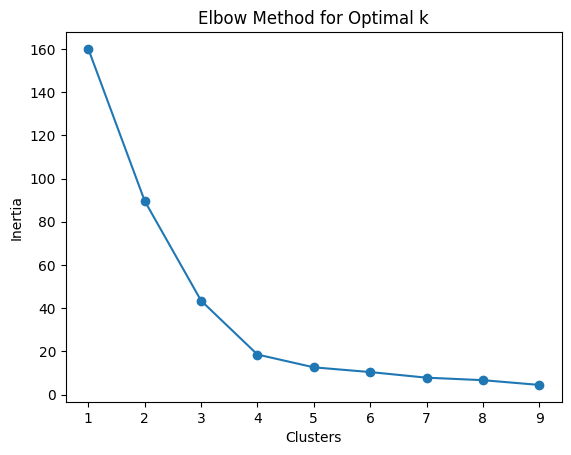

In [16]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Select features for clustering
X = df[['Apr_1_2025', 'May_15_2025', 'Absolute_Change', 'Percent_Change']]

# Standardize
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Find optimal number of clusters using Elbow Method
inertia = []
for k in range(1, 10):
    km = KMeans(n_clusters=k, random_state=42)
    km.fit(X_scaled)
    inertia.append(km.inertia_)

plt.plot(range(1, 10), inertia, marker='o')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Clusters')
plt.ylabel('Inertia')
plt.show()

# Apply clustering
kmeans = KMeans(n_clusters=3, random_state=42)
df['Cluster'] = kmeans.fit_predict(X_scaled)


In [17]:
from scipy.stats import zscore
import numpy as np

# Detect outliers using Z-score
df['Z_change'] = zscore(df['Percent_Change'])
df['Outlier'] = (np.abs(df['Z_change']) > 2).astype(int)

# Show outliers
df[df['Outlier'] == 1]


,Brand,Apr_1_2025,May_15_2025,Percent_Change,Absolute_Change,Price_Ratio,High_Growth,Cluster,Z_change,Outlier
20,Hotel Collection,106.10,239.08,119.44,132.98,2.253346,1,0,2.390865,1
21,Unwritten,20.67,44.62,118.85,23.95,2.158684,1,0,2.373927,1


In [18]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, roc_auc_score, classification_report
from sklearn.model_selection import cross_val_score

X = df[['Apr_1_2025', 'May_15_2025', 'Absolute_Change', 'Price_Ratio']]
y = df['High_Growth']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

models = {
    "Logistic Regression": LogisticRegression(),
    "Random Forest": RandomForestClassifier(),
}

for name, model in models.items():
    model.fit(X_train_scaled, y_train)
    preds = model.predict(X_test_scaled)
    acc = accuracy_score(y_test, preds)
    auc = roc_auc_score(y_test, preds)
    print(f"\n{name}")
    print("Accuracy:", acc)
    print("AUC Score:", auc)
    print(classification_report(y_test, preds))



Logistic Regression
Accuracy: 1.0
AUC Score: 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       1.00      1.00      1.00         3

    accuracy                           1.00         8
   macro avg       1.00      1.00      1.00         8
weighted avg       1.00      1.00      1.00         8


Random Forest
Accuracy: 1.0
AUC Score: 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       1.00      1.00      1.00         3

    accuracy                           1.00         8
   macro avg       1.00      1.00      1.00         8
weighted avg       1.00      1.00      1.00         8



In [19]:
# Already used paired t-test, now testing difference by cluster
import scipy.stats as stats

group1 = df[df['Cluster'] == 0]['Percent_Change']
group2 = df[df['Cluster'] == 1]['Percent_Change']
t_stat, p_val = stats.ttest_ind(group1, group2)
print(f"T-test Between Cluster 0 and 1: p-value = {p_val}")


T-test Between Cluster 0 and 1: p-value = 0.0628566053576218


In [21]:
df.to_csv('Thunderbit_Cleaned.csv', index=False)

from google.colab import files
files.download('Thunderbit_Cleaned.csv')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>